#📌 Extracción

In [1]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
respuesta = requests.get(url)
datos = respuesta.json()
datos = pd.json_normalize(datos)
df = pd.DataFrame(datos)

print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

#🔧 Transformación

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
df = df.drop(['customerID'], axis=1)
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
df.columns = [col.split('.')[-1] for col in df.columns]
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Monthly', 'Total'],
      dtype='object')

In [5]:
df.columns= df.columns.str.lower()
df.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthly', 'total'],
      dtype='object')

In [6]:
df.shape

(7267, 20)

In [7]:
espacios_por_columna = (df.apply(lambda x: x.astype(str).str.contains(r'^\s*$', regex=True)).sum())
print(espacios_por_columna)

churn               224
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod         0
monthly               0
total                11
dtype: int64


In [8]:
import numpy as np

# 1. Reemplazar espacios vacíos por NaN en TODO el DataFrame
df = df.replace(r'^\s*$', np.nan, regex=True)

# 2. Ahora puedes ver el conteo real de nulos oficiales
print(df.isnull().sum())

churn               224
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod         0
monthly               0
total                11
dtype: int64


In [9]:
df = df.dropna(subset=['churn'])
print(df.isnull().sum())

churn                0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthly              0
total               11
dtype: int64


In [10]:
# Contar filas iguales
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")

# Si hay duplicados, elimínalos
if duplicados > 0:
    df = df.drop_duplicates()
    actual = df.duplicated().sum()

print(f"Filas duplicadas encontradas: {actual}")


Filas duplicadas encontradas: 22
Filas duplicadas encontradas: 0


In [11]:
# Revisar valores únicos en columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns

for col in columnas_categoricas:
    print(f"Valores únicos en {col}: {df[col].unique()}")

Valores únicos en churn: ['No' 'Yes']
Valores únicos en gender: ['Female' 'Male']
Valores únicos en partner: ['Yes' 'No']
Valores únicos en dependents: ['Yes' 'No']
Valores únicos en phoneservice: ['Yes' 'No']
Valores únicos en multiplelines: ['No' 'Yes' 'No phone service']
Valores únicos en internetservice: ['DSL' 'Fiber optic' 'No']
Valores únicos en onlinesecurity: ['No' 'Yes' 'No internet service']
Valores únicos en onlinebackup: ['Yes' 'No' 'No internet service']
Valores únicos en deviceprotection: ['No' 'Yes' 'No internet service']
Valores únicos en techsupport: ['Yes' 'No' 'No internet service']
Valores únicos en streamingtv: ['Yes' 'No' 'No internet service']
Valores únicos en streamingmovies: ['No' 'Yes' 'No internet service']
Valores únicos en contract: ['One year' 'Month-to-month' 'Two year']
Valores únicos en paperlessbilling: ['Yes' 'No']
Valores únicos en paymentmethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Valores únic

In [12]:
# Convertir a número y marcar errores como NaN
df['total'] = pd.to_numeric(df['total'], errors='coerce')

# Unificar categorías de "No servicio" a un simple "No"
columnas_a_simplificar = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 
                          'techsupport', 'streamingtv', 'streamingmovies']

for col in columnas_a_simplificar:
    df[col] = df[col].replace('No internet service', 'No')
    
# Hacer lo mismo con el servicio telefónico
df['multiplelines'] = df['multiplelines'].replace('No phone service', 'No')

In [13]:
# Revisar valores únicos en columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns

for col in columnas_categoricas:
    print(f"Valores únicos en {col}: {df[col].unique()}")

Valores únicos en churn: ['No' 'Yes']
Valores únicos en gender: ['Female' 'Male']
Valores únicos en partner: ['Yes' 'No']
Valores únicos en dependents: ['Yes' 'No']
Valores únicos en phoneservice: ['Yes' 'No']
Valores únicos en multiplelines: ['No' 'Yes']
Valores únicos en internetservice: ['DSL' 'Fiber optic' 'No']
Valores únicos en onlinesecurity: ['No' 'Yes']
Valores únicos en onlinebackup: ['Yes' 'No']
Valores únicos en deviceprotection: ['No' 'Yes']
Valores únicos en techsupport: ['Yes' 'No']
Valores únicos en streamingtv: ['Yes' 'No']
Valores únicos en streamingmovies: ['No' 'Yes']
Valores únicos en contract: ['One year' 'Month-to-month' 'Two year']
Valores únicos en paperlessbilling: ['Yes' 'No']
Valores únicos en paymentmethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7021 non-null   object 
 1   gender            7021 non-null   object 
 2   seniorcitizen     7021 non-null   int64  
 3   partner           7021 non-null   object 
 4   dependents        7021 non-null   object 
 5   tenure            7021 non-null   int64  
 6   phoneservice      7021 non-null   object 
 7   multiplelines     7021 non-null   object 
 8   internetservice   7021 non-null   object 
 9   onlinesecurity    7021 non-null   object 
 10  onlinebackup      7021 non-null   object 
 11  deviceprotection  7021 non-null   object 
 12  techsupport       7021 non-null   object 
 13  streamingtv       7021 non-null   object 
 14  streamingmovies   7021 non-null   object 
 15  contract          7021 non-null   object 
 16  paperlessbilling  7021 non-null   object 
 17  

In [15]:
# 1. Crear la nueva columna mediante una operación vectorizada
df['diarias'] = df['monthly'] / 30

# 2. Redondear a dos decimales para mantener la limpieza visual
df['diarias'] = df['diarias'].round(2)

# 3. Visualizar los primeros registros para confirmar el cálculo
print(df[['monthly', 'diarias']].head())

   monthly  diarias
0     65.6     2.19
1     59.9     2.00
2     73.9     2.46
3     98.0     3.27
4     83.9     2.80


In [16]:
# Verificar si hay valores nulos o inconsistentes en la nueva columna
print(df['diarias'].describe())

count    7021.000000
mean        2.161684
std         1.002383
min         0.610000
25%         1.190000
50%         2.350000
75%         3.000000
max         3.960000
Name: diarias, dtype: float64


In [17]:
# Diccionario de mapeo para Sí/No
mapa_binario = {'Yes': 1, 'No': 0}

# Lista de todas las columnas que ahora son binarias
columnas_binarias = [
    'churn', 'partner', 'dependents', 'phoneservice', 'multiplelines',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'paperlessbilling'
]

# Aplicar la transformación de forma masiva
for col in columnas_binarias:
    df[col] = df[col].map(mapa_binario)

# Transformar el género (Estandarización común: Female=1, Male=0 o viceversa)
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

print("Transformación binaria completada.")

Transformación binaria completada.


In [18]:
# Diccionario de traducción para mejorar la claridad y comunicación
traduccion_columnas = {
    'gender': 'genero',
    'tenure': 'antiguedad',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'phoneservice': 'servicio_telefonico',
    'multiplelines': 'lineas_multiples',
    'internetservice': 'servicio_internet',
    'onlinesecurity': 'seguridad_online',
    'onlinebackup': 'respaldo_online',
    'deviceprotection': 'proteccion_dispositivo',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'tv_streaming',
    'streamingmovies': 'peliculas_streaming',
    'contract': 'contrato',
    'paperlessbilling': 'facturacion_sin_papel',
    'paymentmethod': 'metodo_pago',
    'monthly': 'cargos_mensuales',
    'total': 'cargos_totales',
    'churn': 'evasion'
}

df = df.rename(columns=traduccion_columnas)

#📊 Carga y análisis

In [19]:
print(df.describe())

           evasion       genero  seniorcitizen       pareja  dependientes  \
count  7021.000000  7021.000000    7021.000000  7021.000000   7021.000000   
mean      0.264492     0.495656       0.162512     0.484546      0.300527   
std       0.441094     0.500017       0.368947     0.499797      0.458520   
min       0.000000     0.000000       0.000000     0.000000      0.000000   
25%       0.000000     0.000000       0.000000     0.000000      0.000000   
50%       0.000000     0.000000       0.000000     0.000000      0.000000   
75%       1.000000     1.000000       0.000000     1.000000      1.000000   
max       1.000000     1.000000       1.000000     1.000000      1.000000   

        antiguedad  servicio_telefonico  lineas_multiples  seguridad_online  \
count  7021.000000          7021.000000       7021.000000       7021.000000   
mean     32.469449             0.902863          0.423159          0.287566   
std      24.534965             0.296166          0.494095          0.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   evasion                 7021 non-null   int64  
 1   genero                  7021 non-null   int64  
 2   seniorcitizen           7021 non-null   int64  
 3   pareja                  7021 non-null   int64  
 4   dependientes            7021 non-null   int64  
 5   antiguedad              7021 non-null   int64  
 6   servicio_telefonico     7021 non-null   int64  
 7   lineas_multiples        7021 non-null   int64  
 8   servicio_internet       7021 non-null   object 
 9   seguridad_online        7021 non-null   int64  
 10  respaldo_online         7021 non-null   int64  
 11  proteccion_dispositivo  7021 non-null   int64  
 12  soporte_tecnico         7021 non-null   int64  
 13  tv_streaming            7021 non-null   int64  
 14  peliculas_streaming     7021 non-null   int64

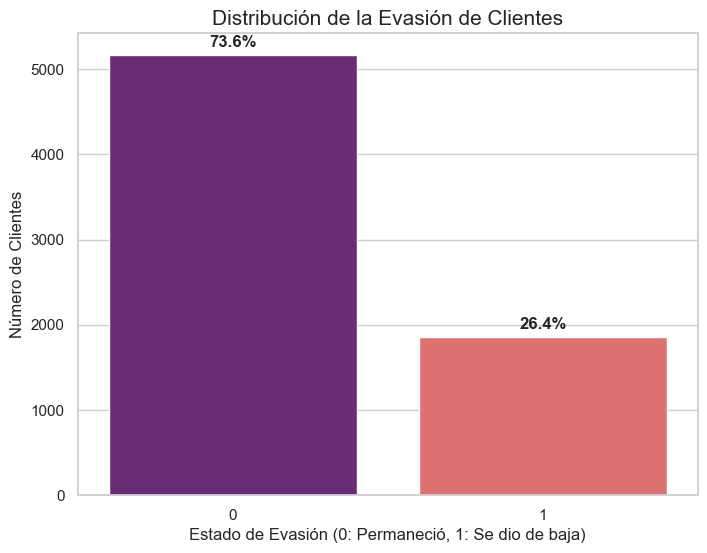

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
# Creamos el gráfico de conteo usando la columna ya traducida 'evasion'
ax = sns.countplot(x='evasion', data=df, hue='evasion', legend=False, palette='magma')

# Añadir títulos y etiquetas claras
plt.title('Distribución de la Evasión de Clientes', fontsize=15)
plt.xlabel('Estado de Evasión (0: Permaneció, 1: Se dio de baja)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Calcular y mostrar porcentajes sobre las barras
total = len(df)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(porcentaje, (p.get_x() + p.get_width() / 2, p.get_height() + 100), 
                ha='center', fontsize=12, fontweight='bold')

plt.show()

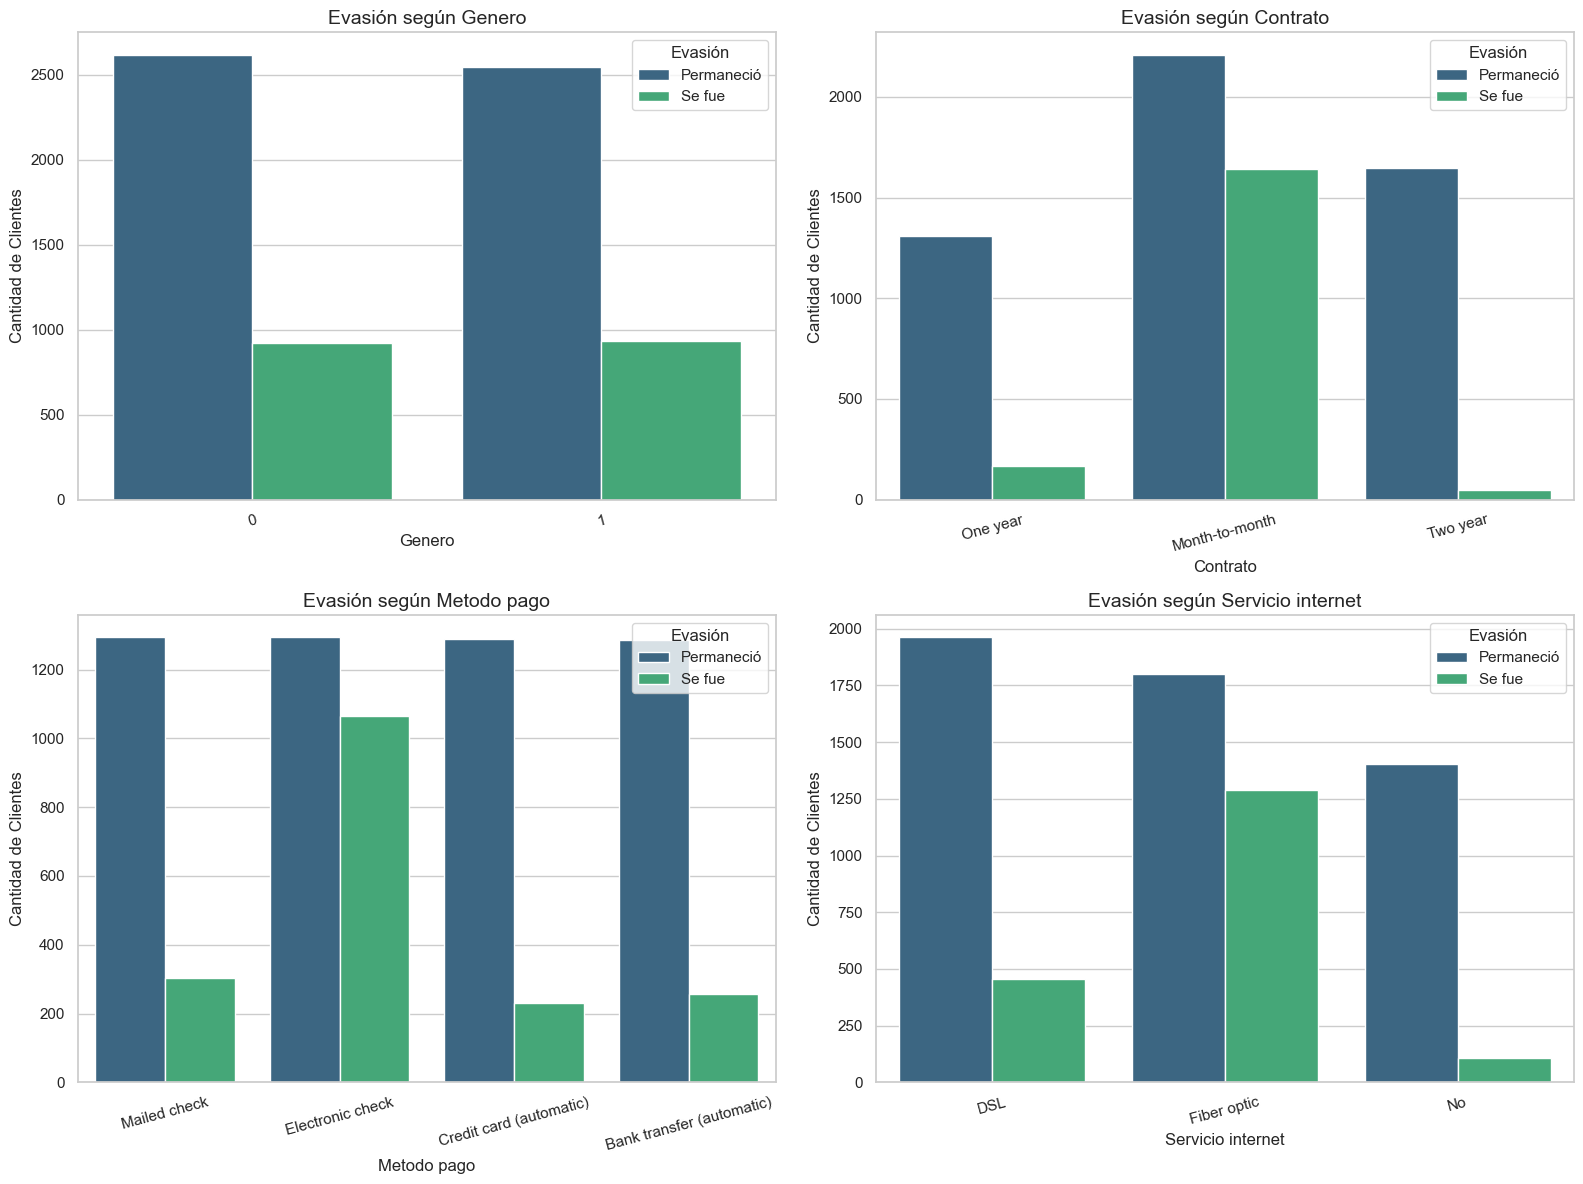

In [22]:
# Definir las variables que queremos explorar
columnas_analisis = ['genero', 'contrato', 'metodo_pago', 'servicio_internet']

# Configurar el tamaño de la figura (cuadrícula de 2x2)
plt.figure(figsize=(16, 12))

for i, col in enumerate(columnas_analisis, 1):
    plt.subplot(2, 2, i)
    
    # Crear el gráfico comparativo
    # Usamos hue='evasion' para separar las barras por el estado de baja
    ax = sns.countplot(x=col, hue='evasion', data=df, palette='viridis')
    
    plt.title(f'Evasión según {col.replace("_", " ").capitalize()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=15) # Rotar etiquetas para mejor lectura
    plt.legend(title='Evasión', labels=['Permaneció', 'Se fue'])

plt.tight_layout()
plt.show()

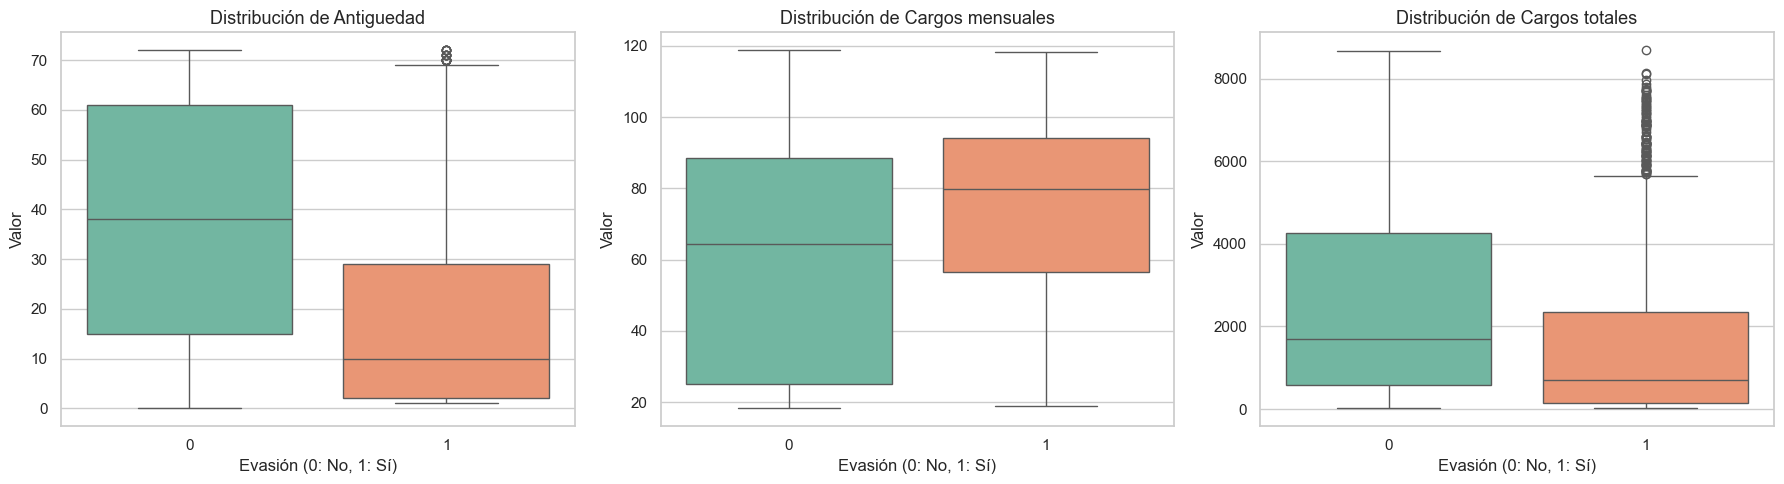

In [23]:
# Asegurémonos de que 'tenure' esté traducido si no lo hiciste antes
if 'tenure' in df.columns:
    df = df.rename(columns={'tenure': 'antiguedad'})

# Definir las variables numéricas clave
vars_numericas = ['antiguedad', 'cargos_mensuales', 'cargos_totales']

plt.figure(figsize=(18, 5))

for i, var in enumerate(vars_numericas, 1):
    plt.subplot(1, 3, i)
    
    # Usamos un Boxplot para ver medianas y dispersión
    sns.boxplot(x='evasion', y=var, data=df, palette='Set2', hue='evasion', legend=False)
    
    plt.title(f'Distribución de {var.replace("_", " ").capitalize()}', fontsize=13)
    plt.xlabel('Evasión (0: No, 1: Sí)')
    plt.ylabel('Valor')

plt.tight_layout()
plt.show()

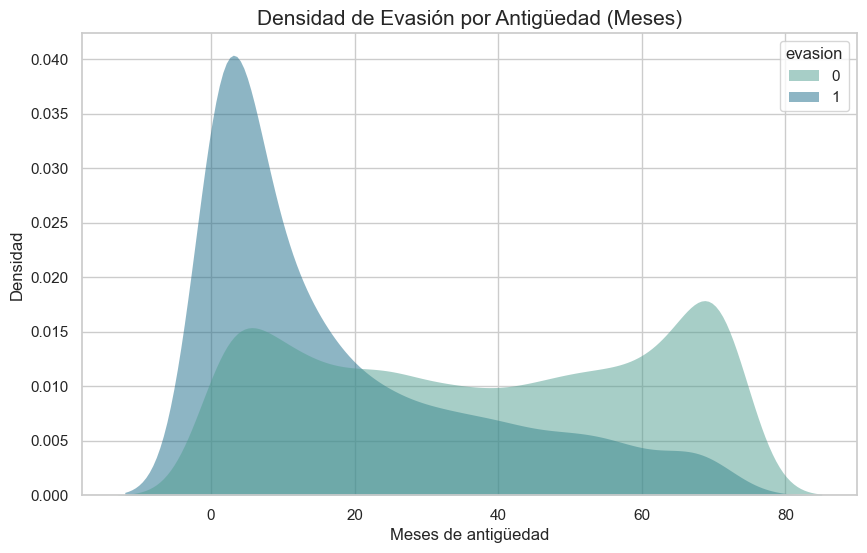

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='antiguedad', hue='evasion', fill=True, common_norm=False, palette='crest', alpha=.5, linewidth=0)
plt.title('Densidad de Evasión por Antigüedad (Meses)', fontsize=15)
plt.xlabel('Meses de antigüedad')
plt.ylabel('Densidad')
plt.show()

In [25]:
# Lista de servicios (ya transformados a 1 y 0)
servicios = [
    'servicio_telefonico', 'lineas_multiples', 'seguridad_online', 
    'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico', 
    'tv_streaming', 'peliculas_streaming'
]

# Sumamos cuántos servicios tiene cada cliente
df['total_servicios'] = df[servicios].sum(axis=1)

print(f"Número de servicios contratados: de {df['total_servicios'].min()} a {df['total_servicios'].max()}")

Número de servicios contratados: de 0 a 8


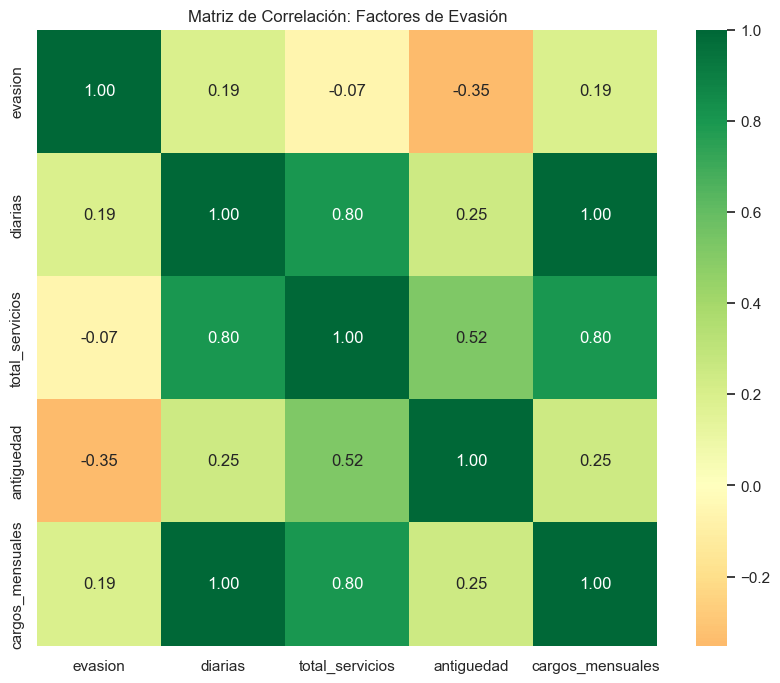

In [27]:
# Seleccionamos las variables clave para el análisis
cols_interes = ['evasion', 'diarias', 'total_servicios', 'antiguedad', 'cargos_mensuales']
matriz_corr = df[cols_interes].corr()

# Visualización con un Mapa de Calor (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='RdYlGn', fmt=".2f", center=0)
plt.title('Matriz de Correlación: Factores de Evasión')
plt.show()

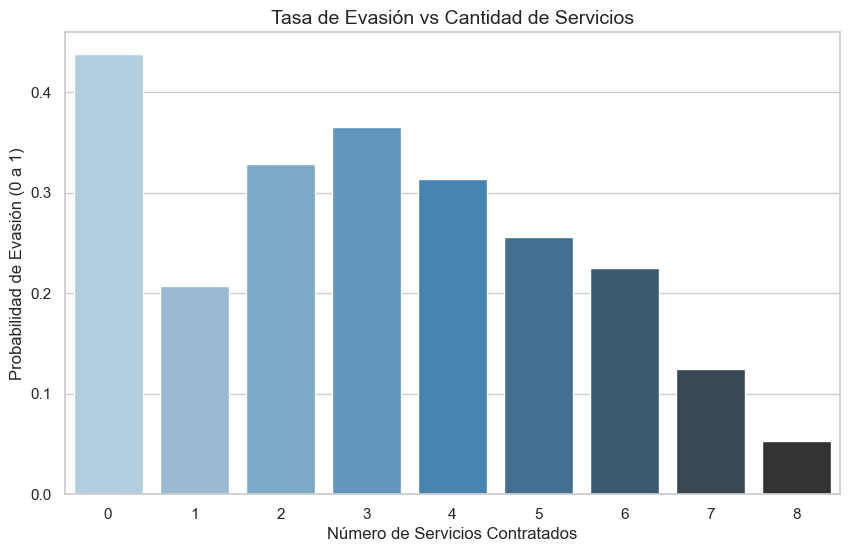

In [28]:
# Calculamos la tasa de evasión por cantidad de servicios
tasa_servicios = df.groupby('total_servicios')['evasion'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='total_servicios', y='evasion', data=tasa_servicios, palette='Blues_d', hue='total_servicios', legend=False)

plt.title('Tasa de Evasión vs Cantidad de Servicios', fontsize=14)
plt.xlabel('Número de Servicios Contratados')
plt.ylabel('Probabilidad de Evasión (0 a 1)')
plt.show()

#📄Informe final

## 🔹 1. Introducción
El objetivo de este análisis es identificar los factores críticos que influyen en la **evasión de clientes (Churn)** dentro del sector de telecomunicaciones. Comprender por qué un usuario decide cancelar su servicio es vital para reducir la pérdida de ingresos y optimizar las estrategias de retención proactiva.

## 🔹 2. Limpieza y Tratamiento de Datos
Para asegurar la fiabilidad de las conclusiones, se aplicó un flujo de trabajo de ETL riguroso:
* **Normalización:** Los datos se estructuraron desde un formato JSON anidado, estandarizando los nombres de las columnas a minúsculas para un manejo eficiente.
* **Limpieza de Nulos:** Se detectaron 224 registros con espacios en blanco (" ") mediante la expresión regular `r'^\s*$'`, los cuales fueron convertidos a `NaN` y posteriormente eliminados para evitar sesgos.
* **Transformación de Tipos:** La columna de cargos totales se convirtió a tipo numérico (float) tras la limpieza.
* **Estandarización Categórica:** Se simplificaron las etiquetas (ej. "No internet service" se unificó como "No") y se transformaron las variables binarias a valores 0 y 1 para facilitar el procesamiento estadístico.
* **Ingeniería de Características:** Se creó la columna `cuentas_diarias` utilizando la fórmula:
  $$cuentas\_diarias = \frac{cargos\_mensuales}{30}$$

## 🔹 3. Análisis Exploratorio de Datos (EDA)
El análisis visual permitió identificar los siguientes patrones de comportamiento:
* **Tasa de Evasión:** El **26.4%** de la base de clientes ha cancelado el servicio, mientras que el **73.6%** permanece activo.
* **Impacto del Contrato:** El contrato "Mes a mes" presenta la mayor tasa de fugas, mientras que los contratos a largo plazo (1 y 2 años) muestran una lealtad significativamente mayor.
* **Factor Económico:** Los clientes que cancelan tienen, en promedio, cargos mensuales más altos (~$80) en comparación con los clientes retenidos (~$65).
* **Distribución de Antigüedad:** Existe un riesgo masivo de fuga durante los primeros 12 meses de servicio. Si el cliente supera el primer año, la probabilidad de evasión disminuye drásticamente.

## 🔹 4. Conclusiones e Insights
1. **Fricción por Precio:** Existe una correlación positiva entre los cargos mensuales elevados y la decisión de abandonar el servicio.
2. **Vulnerabilidad Temprana:** El mayor volumen de "Churn" ocurre en clientes nuevos, lo que indica una debilidad en la experiencia del primer año.
3. **Servicio Premium:** Los usuarios de fibra óptica muestran mayor volatilidad, posiblemente debido a la sensibilidad al precio o competencia en el sector.

## 🔹 5. Recomendaciones
* **Fomentar Contratos Anuales:** Crear incentivos económicos para que los clientes en modalidad mensual migren a planes de larga duración, reduciendo la rotación inmediata.
* **Plan de Retención Temprana:** Implementar campañas de lealtad específicas (descuentos o beneficios adicionales) centradas en los clientes que se encuentran en su primer semestre de servicio.
* **Revisión de Precios Premium:** Evaluar la competitividad de los planes de fibra óptica y cargos mensuales superiores a $75 para mitigar la fuga por sensibilidad al costo.